<div class="alert alert-block alert-info" style="text-align:center;font-size:20px" > <b>Diamond Price Predict</b></div>

<div class="alert alert-block alert-warning" style="text-align:center;font-size:14px" > <b>By Hamid Jamali</b></div>

**Table of contents**<a id='toc0_'></a>    
- [Installing Required Libraries](#toc1_)    
- [Importing Libraries](#toc2_)    
- [Importing Dataset](#toc3_)    
- [EDA](#toc4_)    
  - [Data Profiling](#toc4_1_)    
  - [Drop Unnecessary Columns : Unnamed: 0](#toc4_2_)    
  - [Check for Null Values](#toc4_3_)    
  - [Data Analysis](#toc4_4_)    
- [Preprocessing the Data](#toc5_)    
  - [Check for Duplicate Values](#toc5_1_)    
  - [Encoding Categorical Data](#toc5_2_)    
- [Splitting the Dataset into Training Set and Test Set](#toc6_)    
  - [Train Test Split](#toc6_1_)    
- [Feature Scaling](#toc7_)    
- [Machine Learning Models](#toc8_)    
  - [Linear Regression](#toc8_1_)    
  - [Decision Tree Regression](#toc8_2_)    
  - [Random Forest Regression](#toc8_3_)    
  - [XGBRegressor](#toc8_4_)    
  - [Gradient-Boosting-Regressor Model](#toc8_5_)    
  - [Ada-Boost-Regressor Model](#toc8_6_)    
  - [LGMB Regressor Model](#toc8_7_)    
  - [Cat-Boost-Regressor Model](#toc8_8_)    
- [All Models Comparison](#toc9_)    
- [Conclusion](#toc10_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Installing Required Libraries](#toc0_)

In [5]:
#%pip install numpy
#%pip install pandas
#%pip install matplotlib
#%pip install ipympl
#%pip install seaborn
#%pip install scikit-learn

%pip install xgboost
%pip install catboost
%pip install lightgbm

                                              0.0/99.7 MB ? eta -:--:--
                                              0.0/99.7 MB ? eta -:--:--
                                             0.0/99.7 MB 326.8 kB/s eta 0:05:06
                                             0.1/99.7 MB 819.2 kB/s eta 0:02:02
                                             0.1/99.7 MB 819.2 kB/s eta 0:02:02
                                             0.1/99.7 MB 819.2 kB/s eta 0:02:02
                                              0.6/99.7 MB 2.3 MB/s eta 0:00:44
                                              0.9/99.7 MB 2.8 MB/s eta 0:00:35
                                              1.5/99.7 MB 3.8 MB/s eta 0:00:26
                                              2.1/99.7 MB 4.7 MB/s eta 0:00:21
     -                                        2.7/99.7 MB 5.6 MB/s eta 0:00:18
     -                                        3.0/99.7 MB 5.6 MB/s eta 0:00:18
     -                                        3.3/99.7 MB 5.7 

                                              0.0/101.0 MB ? eta -:--:--
                                              0.0/101.0 MB ? eta -:--:--
                                              0.1/101.0 MB 1.1 MB/s eta 0:01:33
                                              0.3/101.0 MB 2.5 MB/s eta 0:00:41
                                              0.5/101.0 MB 3.7 MB/s eta 0:00:28
                                              0.9/101.0 MB 4.5 MB/s eta 0:00:23
                                              1.3/101.0 MB 5.2 MB/s eta 0:00:20
                                              1.8/101.0 MB 5.9 MB/s eta 0:00:17
                                              2.3/101.0 MB 6.9 MB/s eta 0:00:15
     -                                        2.9/101.0 MB 7.4 MB/s eta 0:00:14
     -                                        3.5/101.0 MB 8.0 MB/s eta 0:00:13
     -                                        4.1/101.0 MB 8.4 MB/s eta 0:00:12
     -                                        4.8/101.

                                              0.0/1.3 MB ? eta -:--:--
                                              0.0/1.3 MB ? eta -:--:--
     -                                        0.0/1.3 MB 393.8 kB/s eta 0:00:04
     -------                                  0.2/1.3 MB 1.8 MB/s eta 0:00:01
     -----------------                        0.6/1.3 MB 2.9 MB/s eta 0:00:01
     ----------------------------             0.9/1.3 MB 3.9 MB/s eta 0:00:01
     ---------------------------------------  1.3/1.3 MB 4.3 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# <a id='toc2_'></a>[Importing Libraries](#toc0_)

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing

#Data visualization libraries
import matplotlib.pyplot as plt # data visualization with matplotlib
import seaborn as sns # data visualization with seaborn
# Interactive plots
%matplotlib inline 

#Data Profiling
from ydata_profiling import ProfileReport

#Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.model_selection import train_test_split # data split
from sklearn.linear_model import LinearRegression  # Linear Regression 
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor # Random Forest Regression , Gradient Boosting Regression, AdaBoost Regression
from xgboost import XGBRegressor # XGBoost Regression
from catboost import CatBoostRegressor # CatBoost Regression
from lightgbm import LGBMRegressor # LightGBM Regression
from sklearn.metrics import mean_squared_error, r2_score # model evaluation

# <a id='toc3_'></a>[Importing Dataset](#toc0_)

In [7]:
df=pd.read_csv('diamonds.csv')

Data Overview

In [9]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [11]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# <a id='toc4_'></a>[EDA](#toc0_)

## <a id='toc4_1_'></a>[Data Profiling](#toc0_)

<div class="alert alert-block alert-info" style="text-align:left;font-size:14px" > <b>UnComment for see and download Data Profile.</b>  I Comment it because it take to much time</div>

Overview of the data embedded in this notebook

In [12]:
#dataset_profile=ProfileReport(df, title="Diamond Data Profile")
#dataset_profile.to_notebook_iframe()


Data Profiling Export to HTML

In [13]:
#dataset_profile.to_file("Diamond Detailed Data Profile.html")

## <a id='toc4_2_'></a>[Drop Unnecessary Columns : Unnamed: 0](#toc0_)

In [14]:
df.drop('Unnamed: 0',axis='columns',inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## <a id='toc4_3_'></a>[Check for Null Values](#toc0_)

In [15]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There is no null values in the dataset

## <a id='toc4_4_'></a>[Data Analysis](#toc0_)

Price Distribution

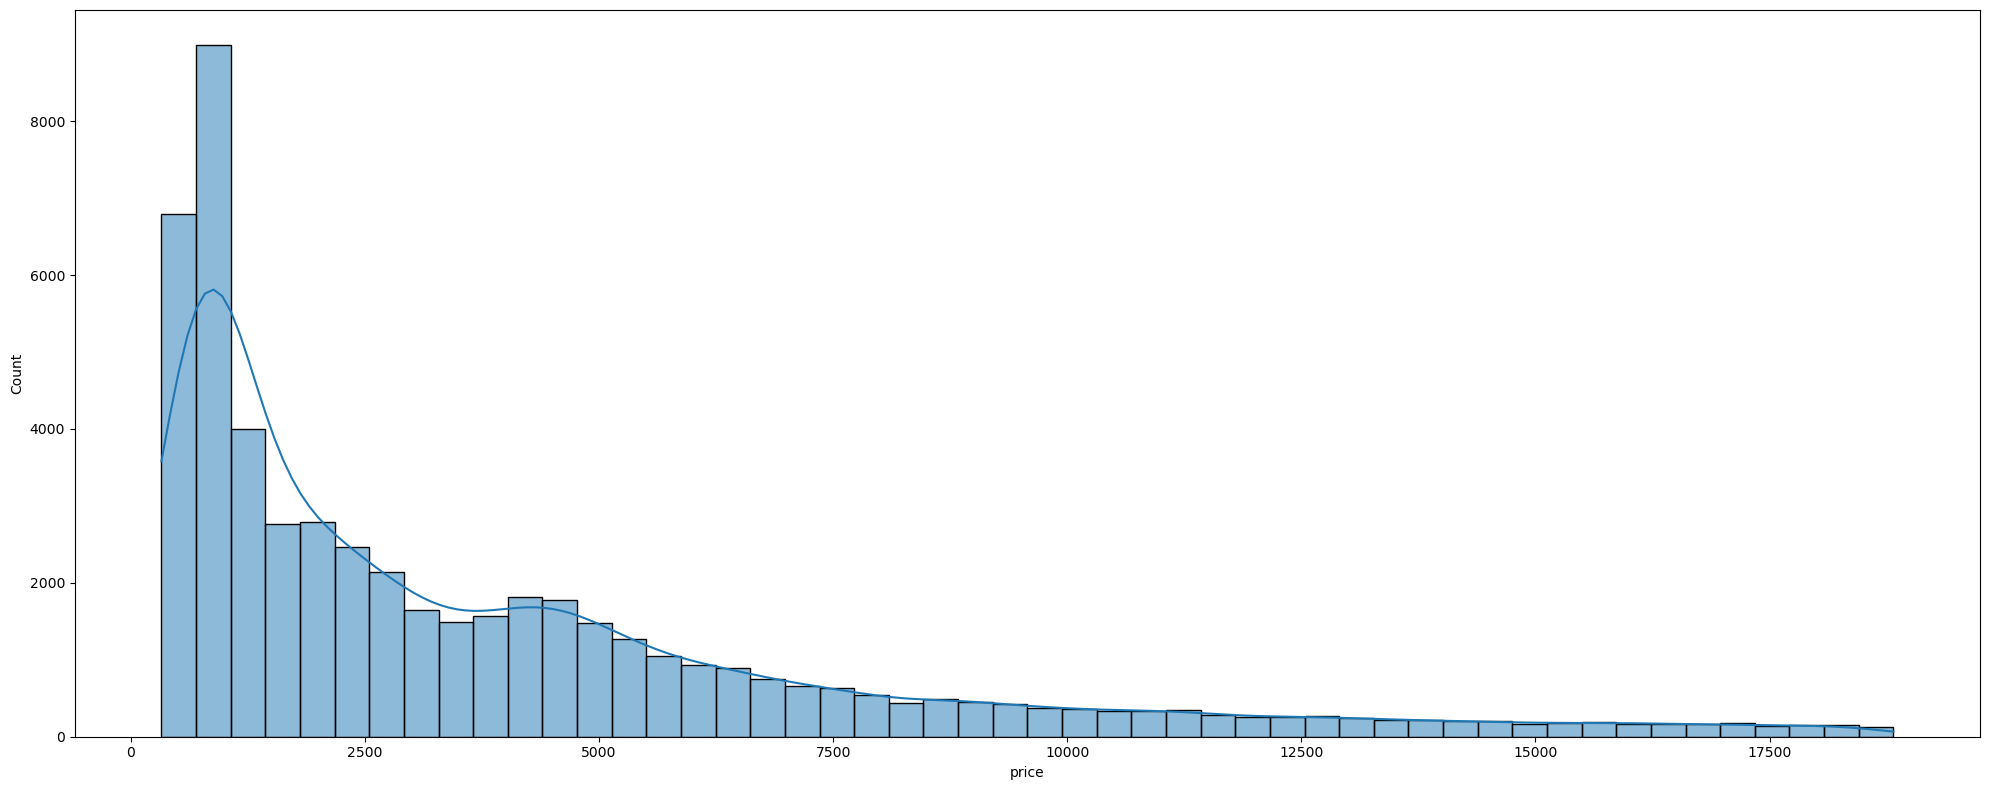

In [16]:
plt.figure(figsize=(20,8))
sns.histplot(x=df['price'],bins=50,kde=True)
plt.tight_layout()
plt.show()

Relation between Price and Carat, Cut, Color, Clarity, Depth, Table, X, Y, Z

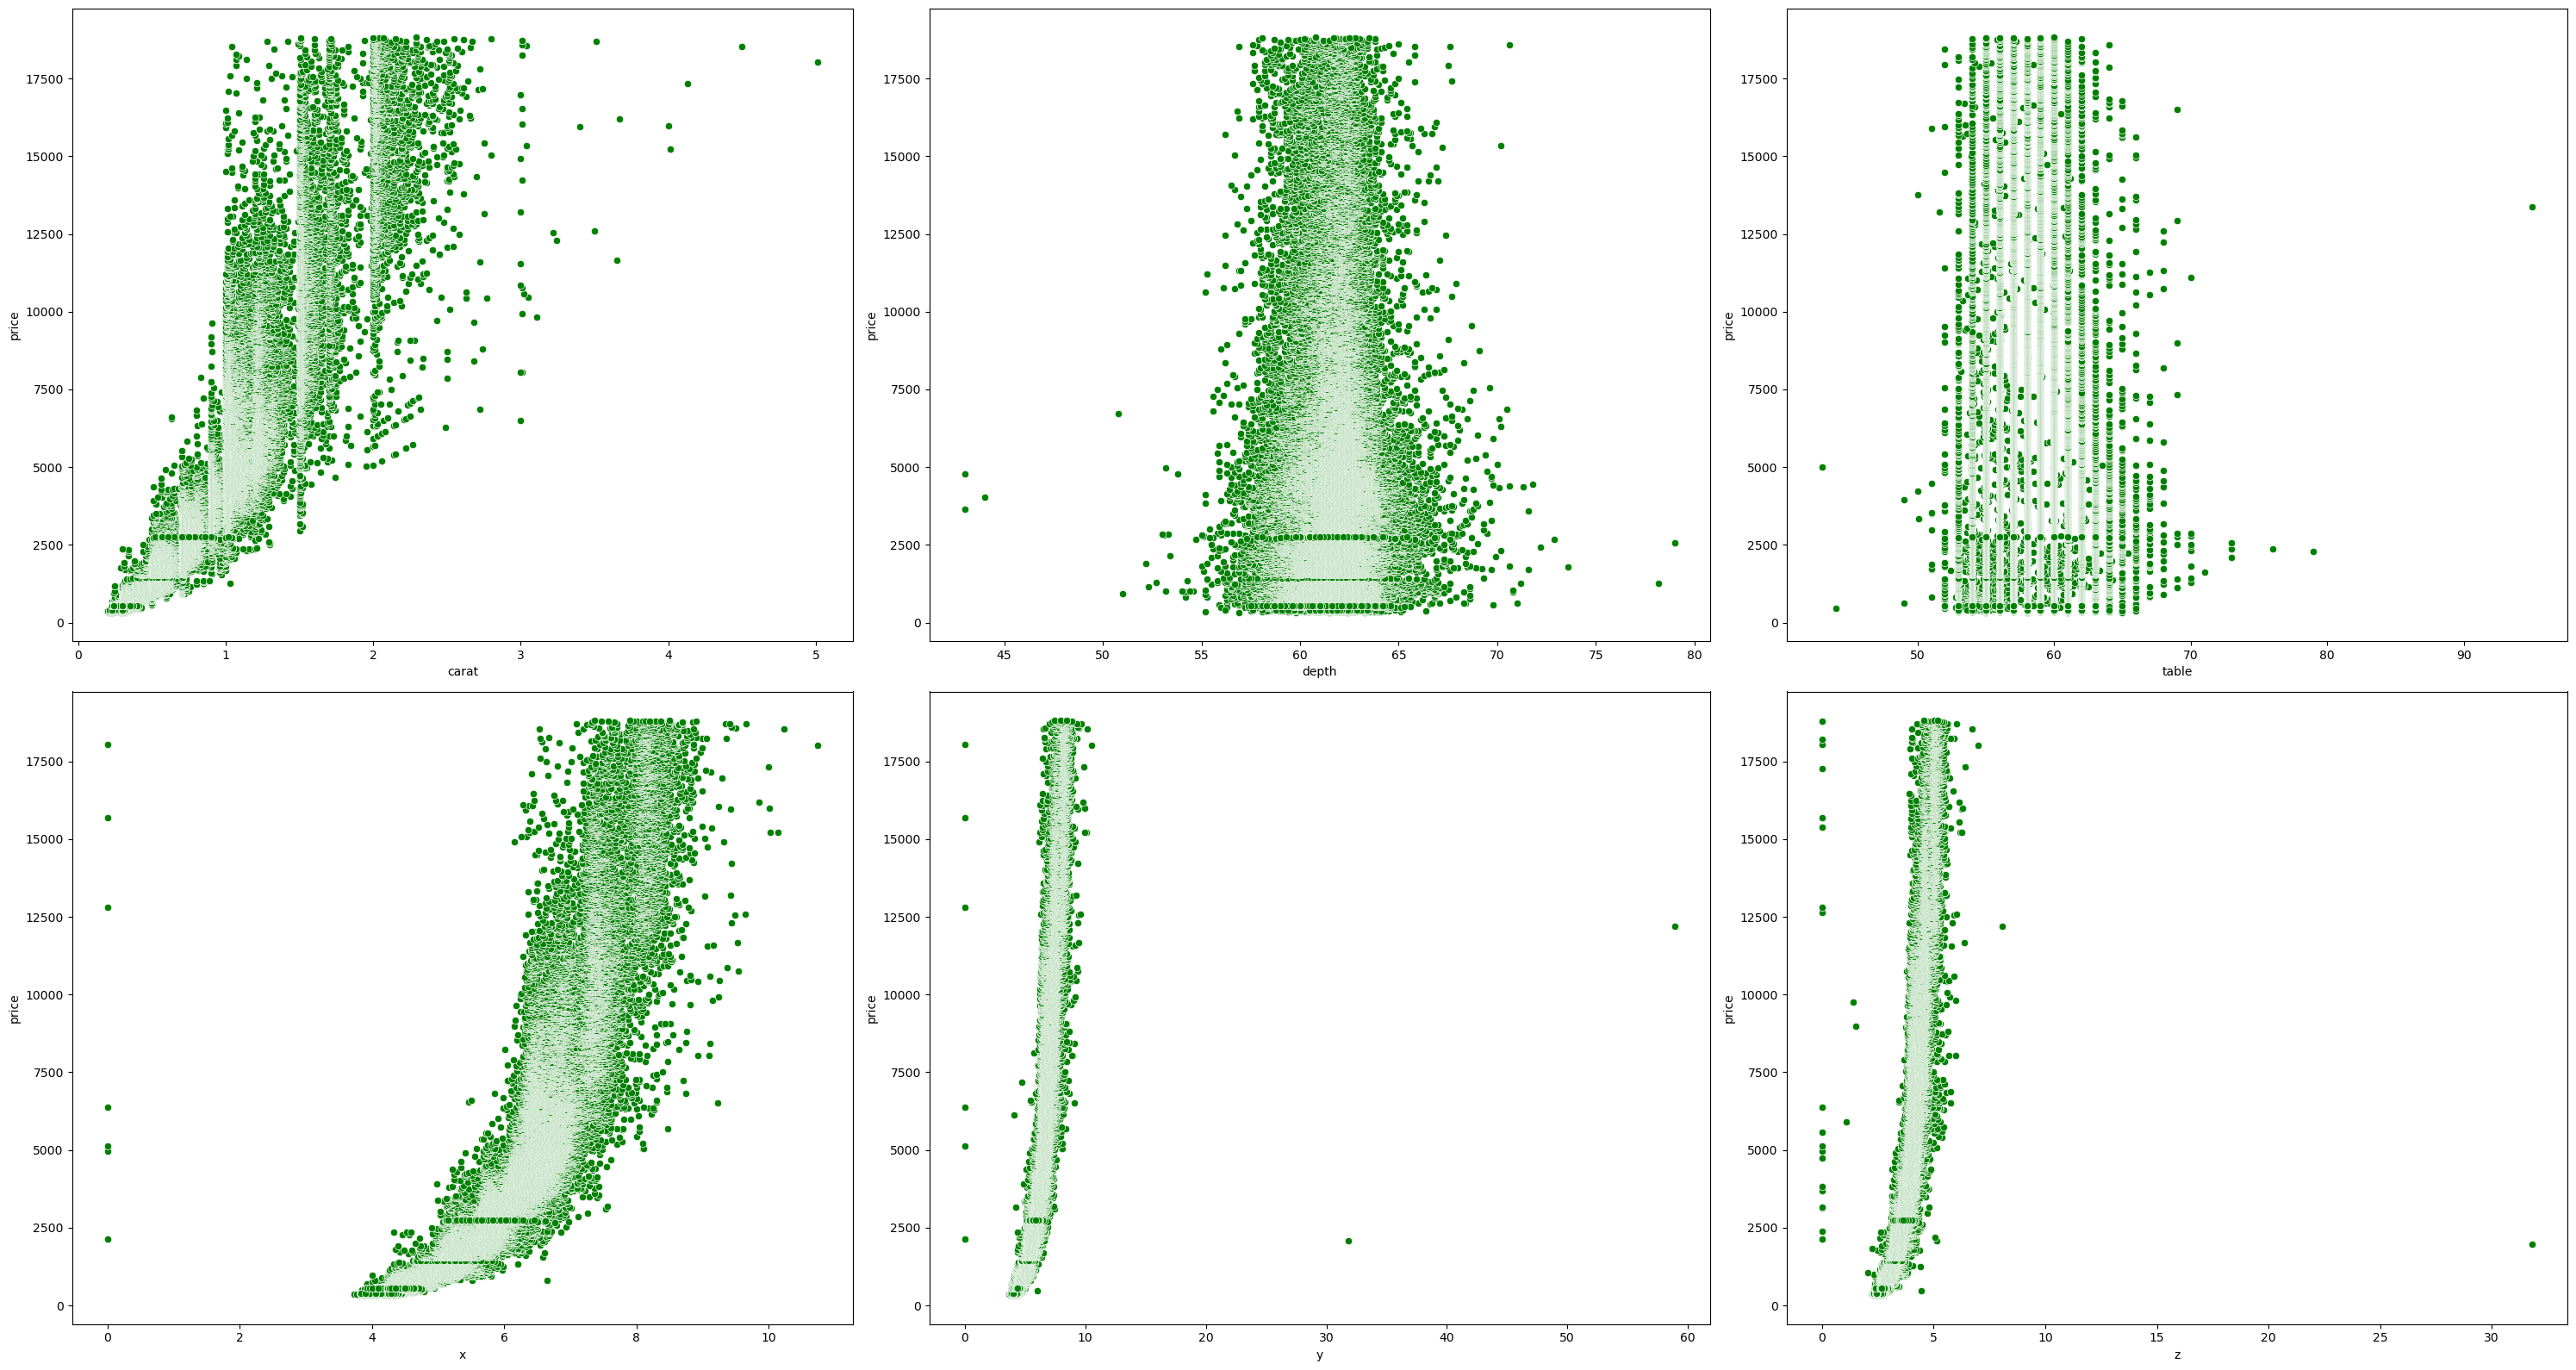

In [17]:
fig,ax=plt.subplots(2,3,figsize=(30,16))
i=0;j=0
for col in (df.select_dtypes(include='float64')):
    sns.scatterplot(x=col,y='price',data=df,color='green',ax=ax[i,j])
    j+=1
    if(j==3):
        j=0
        i+=1
plt.tight_layout()
plt.show()

Relation between Price and Cut , Color , Clarity (Categorical) 

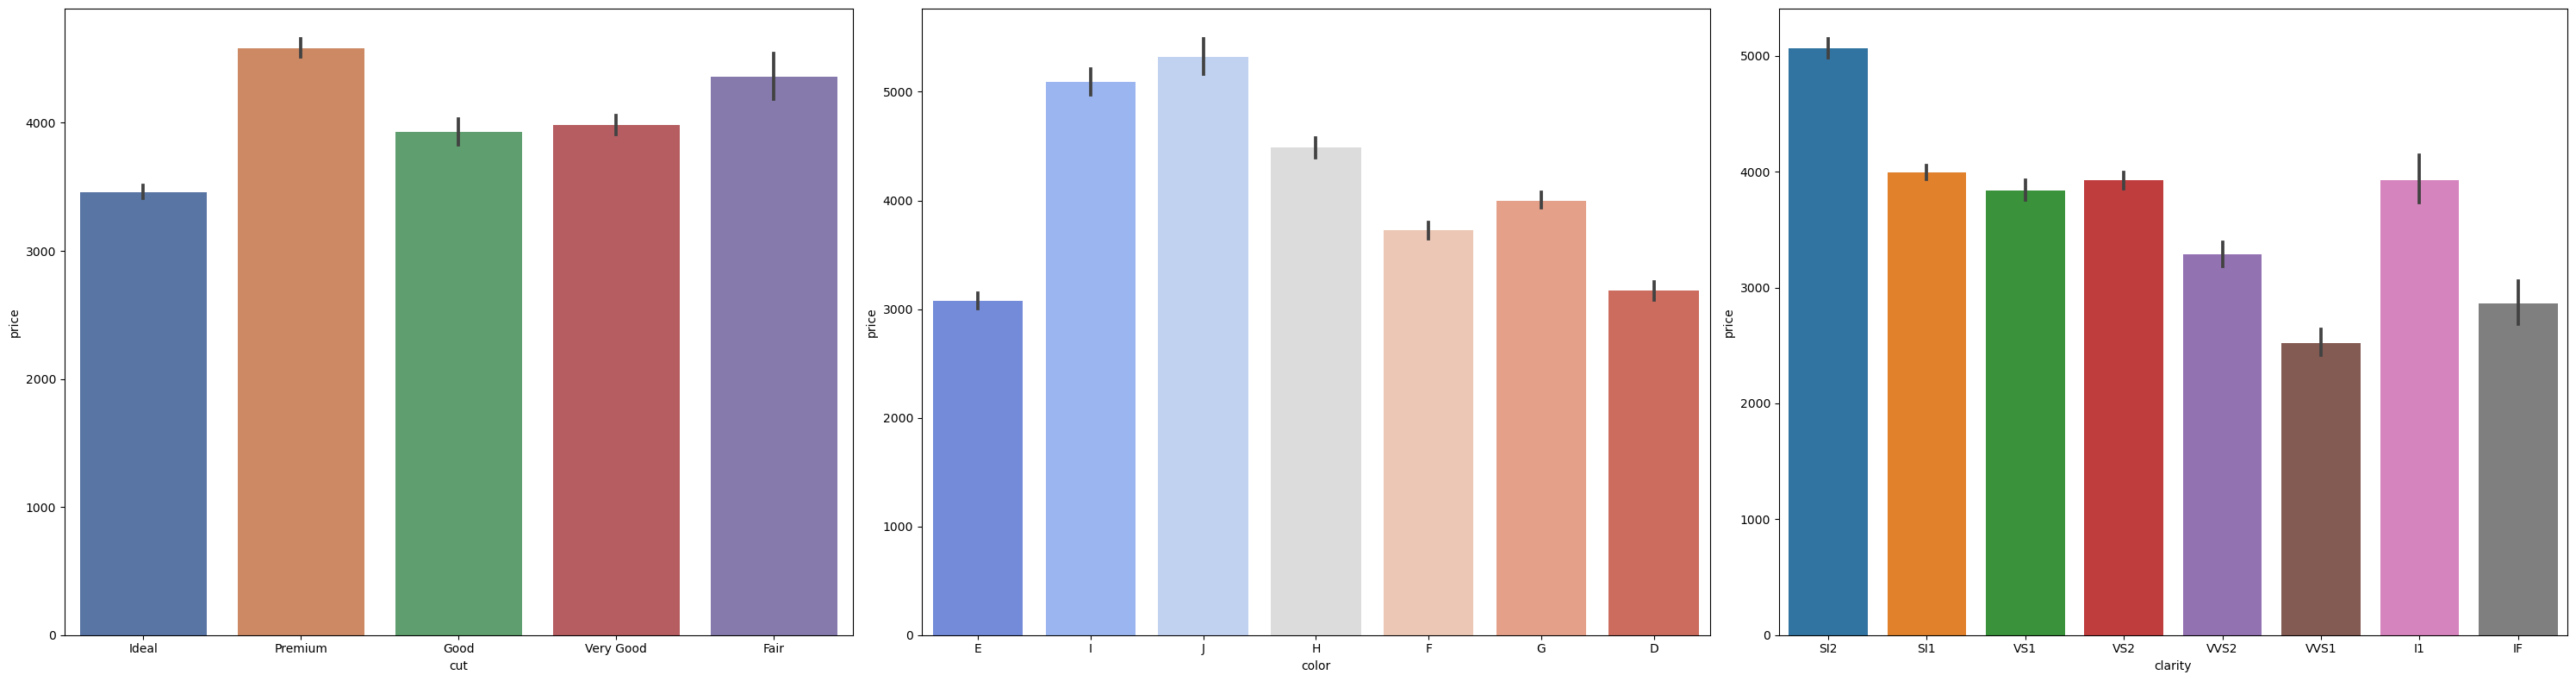

In [18]:
fig,ax=plt.subplots(1,3,figsize=(30,8))
palette=['deep','coolwarm',None]
for i,col in enumerate(df.select_dtypes(include='object').columns):
    sns.barplot(x=col,y='price',data=df,ax=ax[i],palette=palette[i])
plt.tight_layout()
plt.show()

In [ ]:
# Sample data
data = {'category': ['A', 'B', 'C', 'A', 'B', 'C', 'A']}
df = pd.DataFrame(data)

# Applying label encoding
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

print(df)

Count of Cut, Color, Clarity (Categorical)

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(30,8))
palette=['deep','coolwarm',None]
for i,col in enumerate(df.select_dtypes(include='object').columns):
    sns.countplot(x=col,data=df,ax=ax[i],palette=palette[i])
plt.tight_layout()
plt.show()


No such diamond can exist whose length or width or depth is zero, so entries with any of these are abnormal and thus dropping them. Also, elements with width(y)>30 and depth(z)>30 seems to be outliers, so removing them too.


In [ ]:
#Make a copy of the original dataset
data_new = df.copy()
data_new

Drop the rows with x=0, y=0, z=0 and y>30, z>30

In [ ]:
data_new.drop(data_new.loc[(data_new['x']==0)|(data_new['y']==0)|(data_new['z']==0)|(data_new['y']>30)|(data_new['z']>30)].index,inplace=True)
data_new

Now we visualize the data after removing the outliers of x, y, z

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(30,16))
i=0;j=0
for col in (df.select_dtypes(include='float64')):
    sns.scatterplot(x=col,y='price',data=df,color='green',ax=ax[i,j])
    j+=1
    if(j==3):
        j=0
        i+=1
plt.tight_layout()
plt.show()

Now we can see that as the carat increases, the price also increases. So, we can say that carat is directly proportional to price.

As we can see the elements with table>80 are outliers, so removing them.

In [ ]:
data_new.drop(data_new.loc[data_new['table']>80].index,inplace=True)
data_new

# <a id='toc5_'></a>[Preprocessing the Data](#toc0_)

## <a id='toc5_1_'></a>[Check for Duplicate Values](#toc0_)

In [ ]:
data_new[data_new.duplicated()]
data_new.drop_duplicates(inplace=True)
data_new

As you can see there are 145 duplicates in the dataset. So, we will remove them.

## <a id='toc5_2_'></a>[Encoding Categorical Data](#toc0_)

I have to encode the categorical data to numerical data so that the machine learning model can understand it.
In this dataset we have to encode the Cut, Color and Clarity columns.

I wanna use pd.get_dummies() method to encode the categorical data.

In [ ]:
#Keep Original Data for further actions
data_Categorical=data_new.copy()

In [ ]:
data_new_ready=pd.get_dummies(data_new,columns=['cut','color','clarity'],drop_first=True)
data_new_ready

# <a id='toc6_'></a>[Splitting the Dataset into Training Set and Test Set](#toc0_)

I set target variable as Price and rest of the variables as features.

In [ ]:
target='price'
X=data_new_ready.drop([target],axis=1)
y=data_new_ready[[target]]

Cheking the content of x , y

In [ ]:
X.head(1)

In [ ]:
y.head(1)

## <a id='toc6_1_'></a>[Train Test Split](#toc0_)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,)

# <a id='toc7_'></a>[Feature Scaling](#toc0_)

We have to scale the features so that the machine learning model can understand it.

In [ ]:
SC_X = StandardScaler()
X_train = SC_X.fit_transform(X_train)
X_test = SC_X.transform(X_test)


# <a id='toc8_'></a>[Machine Learning Models](#toc0_)

First define a function for Model Evaluation

In [ ]:
training_score = []
testing_score = []
rmse=[]

In [ ]:
def model_prediction(model):
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    a = r2_score(y_train,y_train_pred)*100
    b = r2_score(y_test,y_test_pred)*100
    c = mean_squared_error(y_test, y_test_pred)
    training_score.append(a)
    testing_score.append(b)
    rmse.append(c)


    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print(f"RMSE of {model} model on Testing Data is:",c)
    

## <a id='toc8_1_'></a>[Linear Regression](#toc0_)

In [ ]:
model_prediction(LinearRegression())


## <a id='toc8_2_'></a>[Decision Tree Regression](#toc0_)

In [ ]:
model_prediction(DecisionTreeRegressor())

## <a id='toc8_3_'></a>[Random Forest Regression](#toc0_)

In [ ]:
model_prediction(RandomForestRegressor())

## <a id='toc8_4_'></a>[XGBRegressor](#toc0_)

In [ ]:
model_prediction(XGBRegressor())

## <a id='toc8_5_'></a>[Gradient-Boosting-Regressor Model](#toc0_)

In [ ]:
model_prediction(GradientBoostingRegressor())

## <a id='toc8_6_'></a>[Ada-Boost-Regressor Model](#toc0_)

In [ ]:
model_prediction(AdaBoostRegressor())

## <a id='toc8_7_'></a>[LGMB Regressor Model](#toc0_)

In [ ]:
model_prediction(LGBMRegressor())

## <a id='toc8_8_'></a>[Cat-Boost-Regressor Model](#toc0_)

In [ ]:
model_prediction(CatBoostRegressor(verbose=False))

# <a id='toc9_'></a>[All Models Comparison](#toc0_)

create a dataframe for all models comparison 

In [ ]:
models = ["Linear Regression","Decision Tree Regression","Random Forest Regression","XGBoost" ,"Gradient Boosting Regression","AdaBoost Regression","LGBM Regression","CatBoost Regression"]

In [ ]:
compare_models = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,"RMSE":rmse})
compare_models

Plotting the graph of all the models using their R2 Score with bar plot

In [ ]:
compare_models.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",title="Performance Visualization of Different Models by R2Score",colormap="rainbow")
plt.show()

Plotting the graph of all the models using their RMSE with bar plot

In [ ]:
compare_models.plot(x="Algorithms",y=["RMSE"], figsize=(16,6),kind="bar",title="Performance Visualization of Different Models by R2Score",colormap="Dark2")
plt.show()

# <a id='toc10_'></a>[Conclusion](#toc0_)

After evaluating the RMSE and R2 score values of the regression models, the following conclusions can be drawn:

 - Linear Regression: R2 Score : 92.04%, RMSE : 1.274353e+06
 - Decision Tree Regression: R2 Score : 95.23%, RMSE : 7.635765e+05
 - Random Forest Regression: R2 Score : 97.54%, RMSE : 3.940213e+05
 - XGBoost: R2 Score : 97.83%, RMSE : 3.467581e+05
 - Gradient Boosting Regression: R2 Score : 95.49%, RMSE : 7.222692e+05
 - AdaBoost Regression: R2 Score : 84.75%, RMSE : 2.440771e+06
 - LGBM Regression: R2 Score : 98.02%, RMSE : 3.173658e+05
 - CatBoost Regression: R2 Score : 97.99%, RMSE : 3.201660e+05

The LGBM Regression model stands out as the top performer, with the lowest RMSE value of 3.173658e+05 and a high R2 score of 98.02%. This indicates that the LGBM Regression model provides accurate predictions and a good fit to the data.

The XGBoost and CatBoost Regression models also exhibit strong performance, with both models achieving high R2 scores (97.83% and 97.99%, respectively) and relatively low RMSE values (3.467581e+05 and 3.201660e+05, respectively).

The Random Forest Regression model demonstrates a relatively high R2 score of 97.54%, but its RMSE value (3.940213e+05) is slightly higher compared to the top-performing models.

The Decision Tree Regression and Gradient Boosting Regression models exhibit lower R2 scores (95.23% and 95.49%, respectively) and higher RMSE values (7.635765e+05 and 7.222692e+05, respectively) compared to the top models.

The AdaBoost Regression model has the lowest R2 score (84.75%) and the highest RMSE value (2.440771e+06), indicating relatively poorer performance compared to the other models.

<b>In conclusion</b>, after comparing the R2 scores and RMSE values of various regression models, the LGBM Regression model consistently emerges as a strong performer. With an impressive R2 score of 98.02% and a relatively low RMSE value of 3.173658e+05, the LGBM Regression model demonstrates both a good fit to the data and accurate predictions.

The XGBoost and CatBoost Regression models also exhibit high R2 scores and relatively low RMSE values, positioning them as viable alternatives for consideration.

Although the Random Forest Regression model showcases a high R2 score of 97.54%, its slightly higher RMSE value of 3.940213e+05 suggests that it may not perform as well as the LGBM Regression, XGBoost, or CatBoost models in terms of prediction accuracy.